id : 샘플 아이디
Species: 펭귄의 종을 나타내는 문자열
Island : 샘플들이 수집된 Palmer Station 근처 섬 이름
Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기
Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이
Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이
Flipper Length (mm) : 펭귄의 팔(날개) 길이
Sex : 펭귄의 성별
Delta 15 N (o/oo)  : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율
Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율
Body Mass (g): 펭귄의 몸무게를 나타내는 숫자 (g)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font',size=20)

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
submit=pd.read_csv("sample_submission.csv")

In [3]:
#변수 설명
print(train.keys())
print(train.info())

Index(['id', 'Species', 'Island', 'Clutch Completion', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Sex', 'Delta 15 N (o/oo)',
       'Delta 13 C (o/oo)', 'Body Mass (g)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   114 non-null    int64  
 1   Species              114 non-null    object 
 2   Island               114 non-null    object 
 3   Clutch Completion    114 non-null    object 
 4   Culmen Length (mm)   114 non-null    float64
 5   Culmen Depth (mm)    114 non-null    float64
 6   Flipper Length (mm)  114 non-null    int64  
 7   Sex                  111 non-null    object 
 8   Delta 15 N (o/oo)    111 non-null    float64
 9   Delta 13 C (o/oo)    111 non-null    float64
 10  Body Mass (g)        114 non-null    int64  
dtypes: float64(4), i

In [4]:
def missing(data):
    missing_col=[]
    for i in data.columns:
        if data[i].isnull().sum()>=1:
            missing_col.append(i)
    return missing_col
print("train missing :",missing(train))
print("test missing :",missing(test))

train missing : ['Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
test missing : ['Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']


id열 삭제,결측치가 있는 변수는 train, test 둘 다 Sex, Delta 15N, Delta13C이다. 여기서 Delta 15N, Delta13C변수의 결측치는 평균으로 대체하였다. Sex에서의 결측치는 미입력으로 간주하여 'UNKNOWN'으로 대체

In [5]:
def fill_missing(data):
    data.drop('id',axis=1,inplace=True)
    for i in missing(data):
        if data[i].dtype=='float':
            data[i].fillna(np.mean(data[i]),inplace=True)
        else:
            data[i].fillna('UNKNOWN',inplace=True)
fill_missing(train)
fill_missing(test)

EDA

In [6]:
#describe
train.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,44.613158,17.014912,203.052632,8.737634,-25.723051,4327.850877
std,5.321829,1.941363,14.653425,0.560112,0.848296,781.766484
min,33.500000,13.200000,174.000000,7.632200,-27.018540,2700.000000
25%,40.325000,15.225000,190.000000,8.273890,-26.414327,3675.000000
50%,45.200000,17.250000,199.000000,8.635460,-25.897875,4250.000000
75%,49.075000,18.600000,216.000000,9.256210,-25.012013,4850.000000
max,55.100000,21.100000,231.000000,10.025440,-24.102550,6300.000000


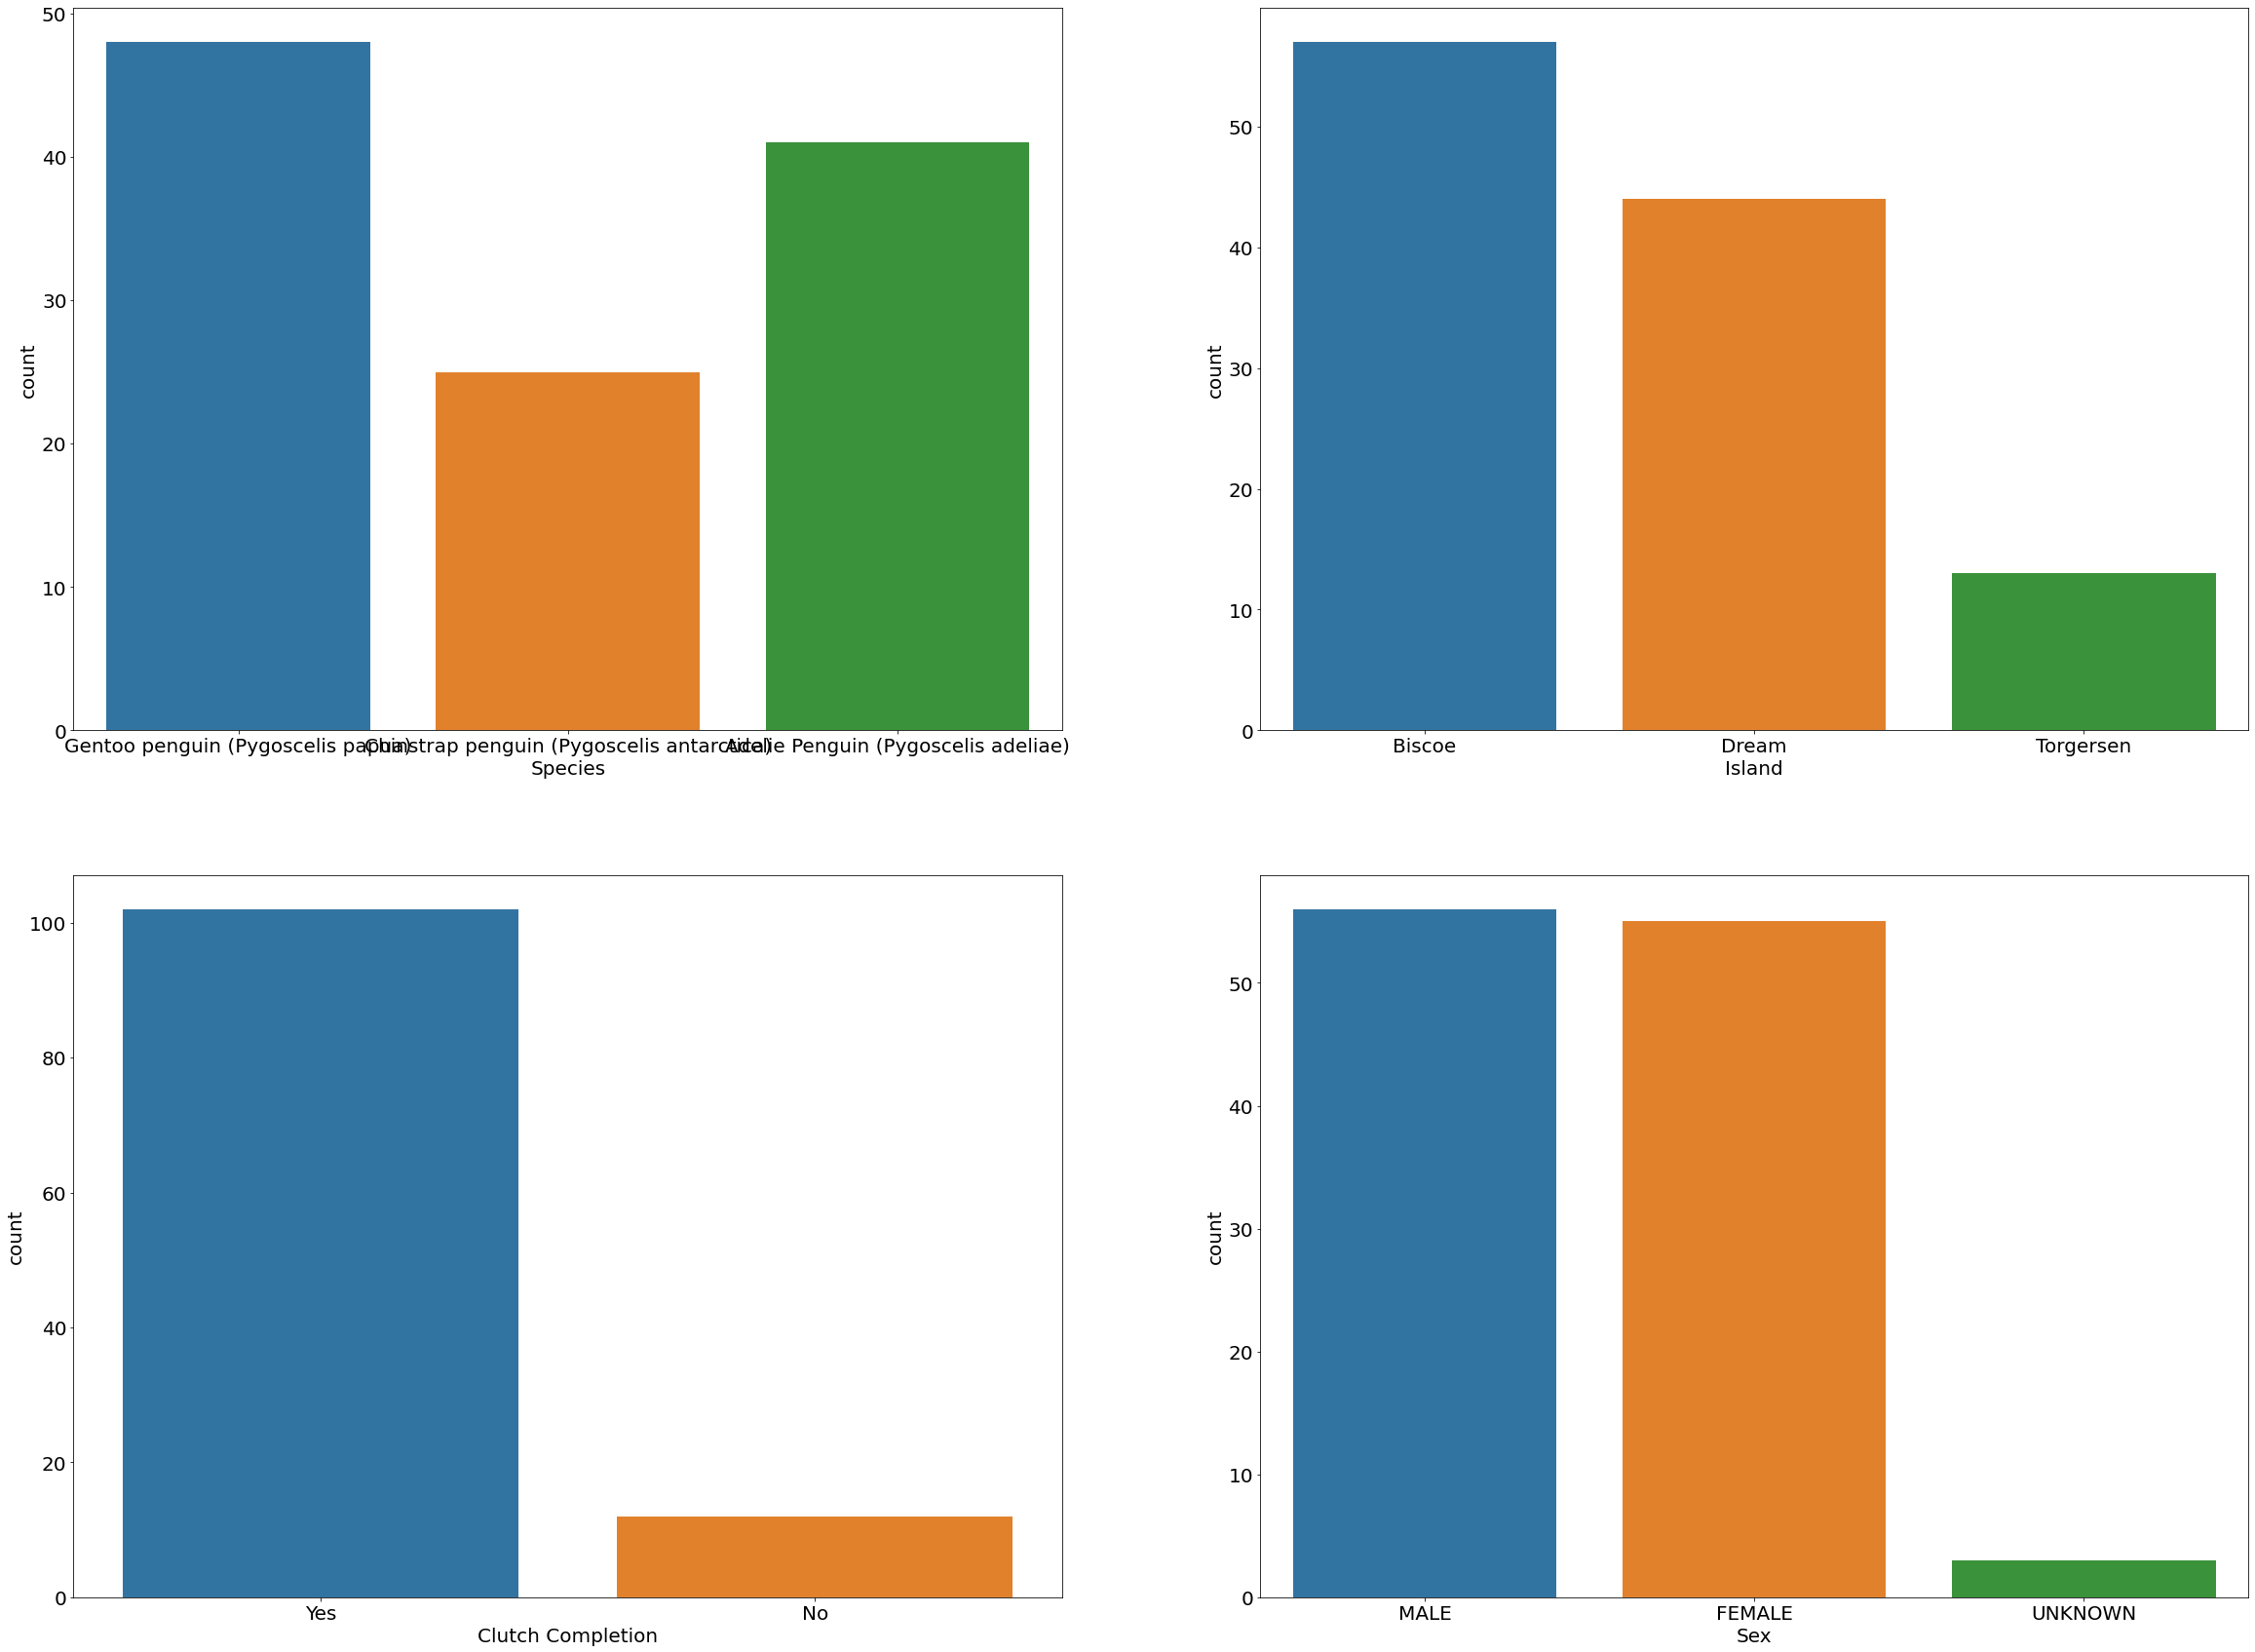

In [7]:
objectcol=[]
for obj in train.columns:
    if train[obj].dtype=='object':
        objectcol.append(obj)
plt.figure(figsize=(40,30))
for i in range(len(objectcol)):
    plt.subplot(2,2,i+1)
    sns.countplot(train[objectcol[i]])

성별, 종, 섬에 따른 펭귄의 무게

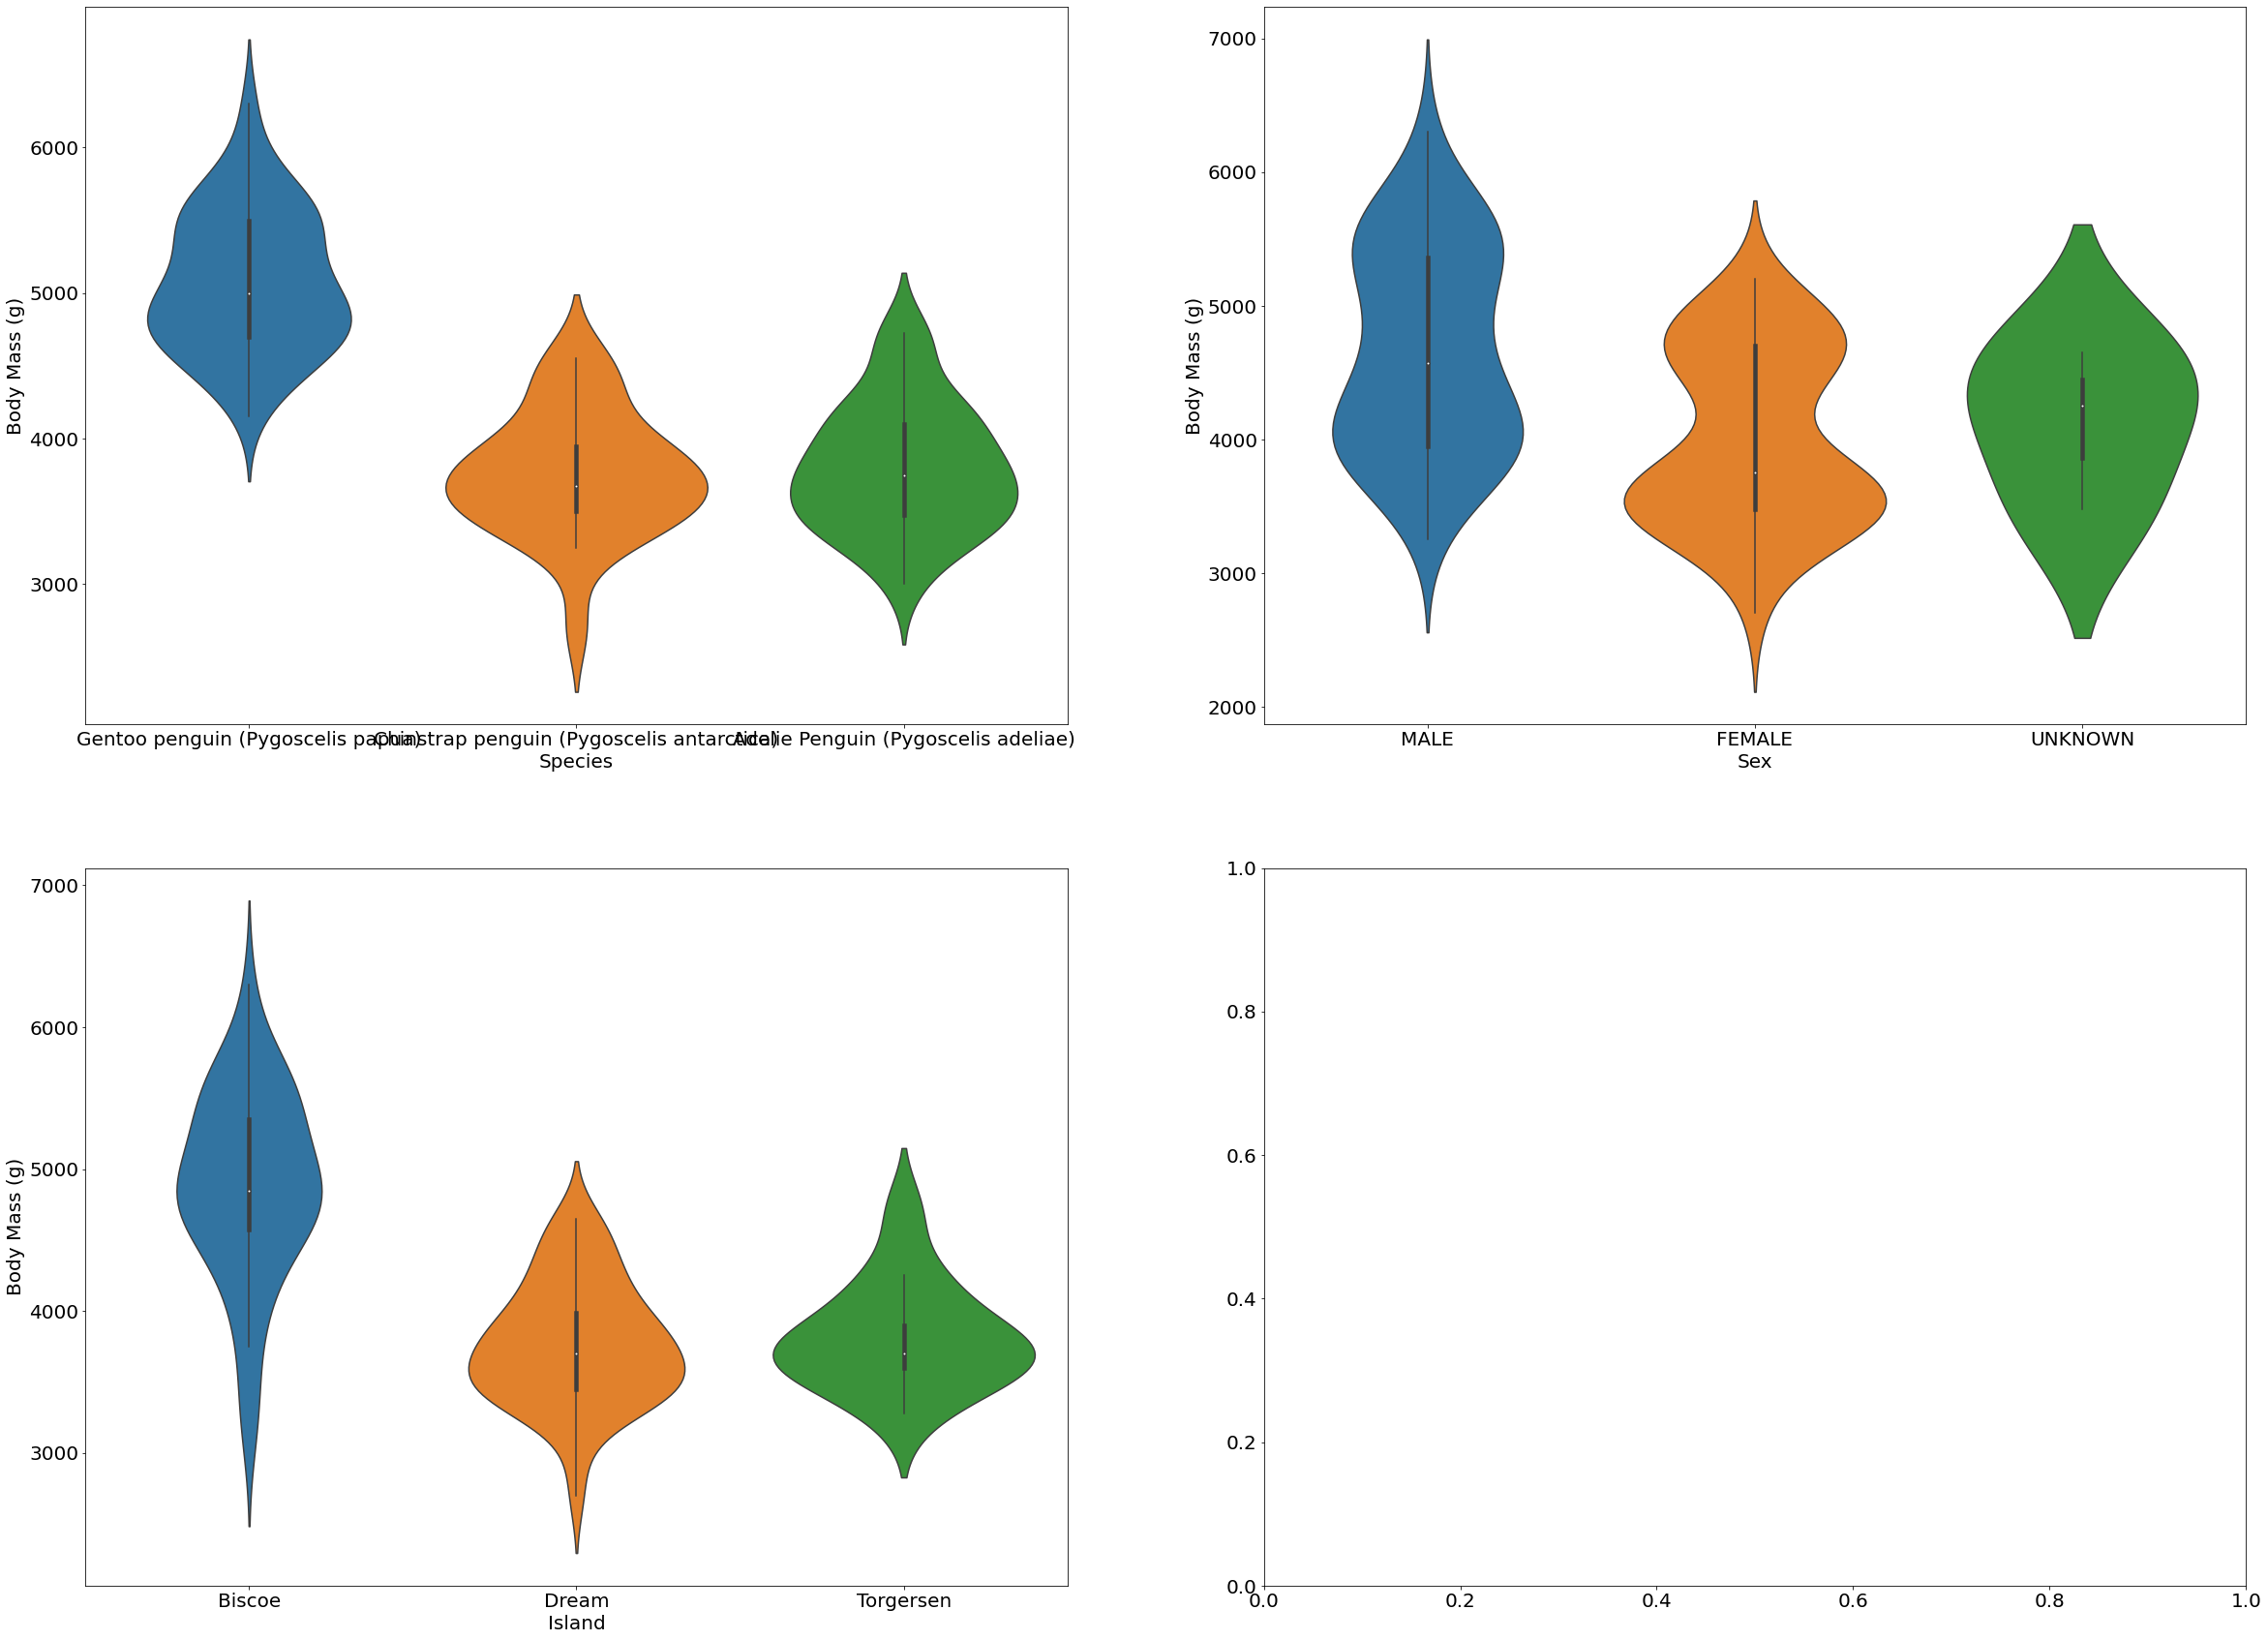

In [8]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2)
fig.set_size_inches(40,30)
sns.violinplot(y='Body Mass (g)',x='Species',data=train,ax=ax1)
sns.violinplot(y='Body Mass (g)',x='Sex',data=train,ax=ax2)
sns.violinplot(y='Body Mass (g)',x='Island',data=train,ax=ax3)

각 변수는 세 가지 카테고리로 되어있고 이 중 두 카테고리의 BodyMass값이 비슷 한 것으로 나타났다. 처음에 BodyMass값이 비슷한 카테고리를 한 범주로 통합시키려 했으나 위 막대그래프로 그려본 결과 카테고리별 표본 개수에 차이가 있었기 때문에 넘어가기로 했다.

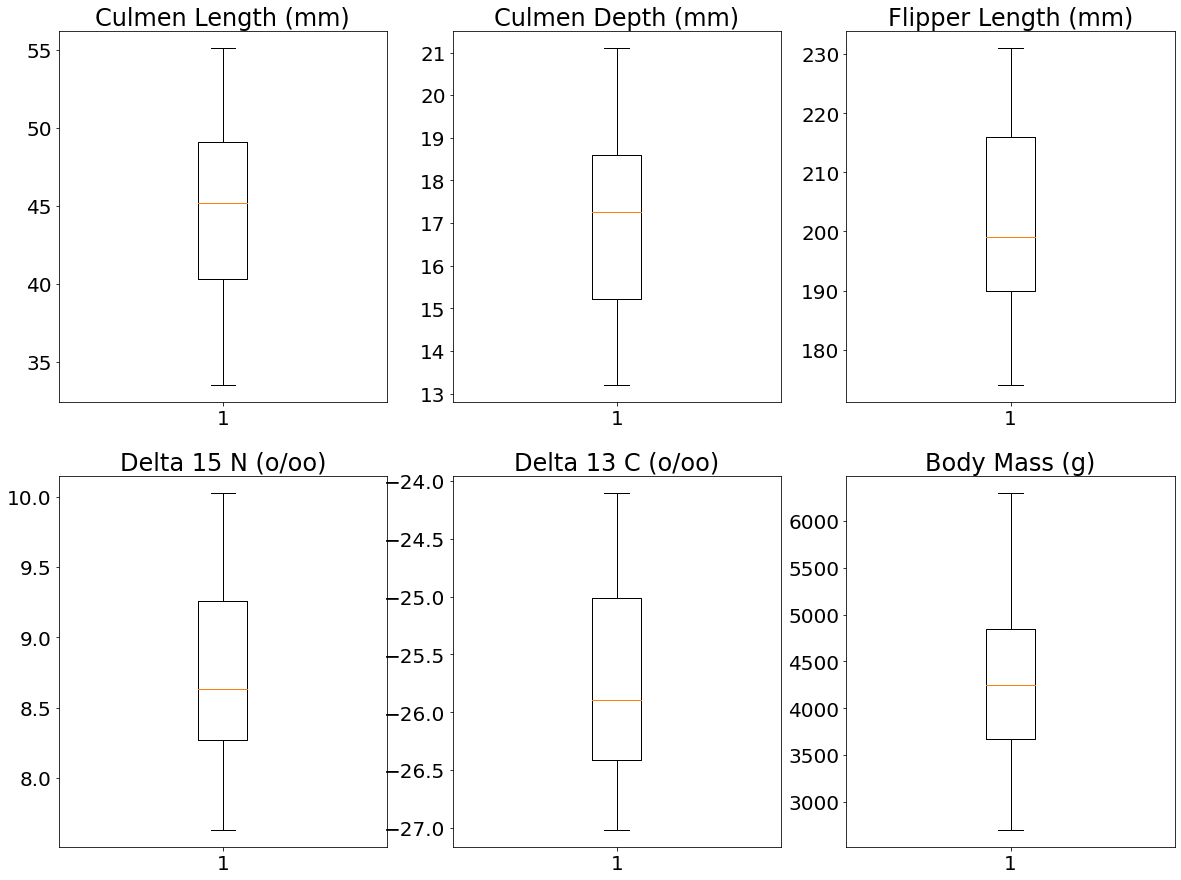

In [9]:
floatcol=train.describe().columns
plt.figure(figsize=(20,15))
for i in range(len(floatcol)):
    plt.subplot(2,3,i+1)
    plt.title(floatcol[i])
    plt.boxplot(train[floatcol[i]])
plt.show()

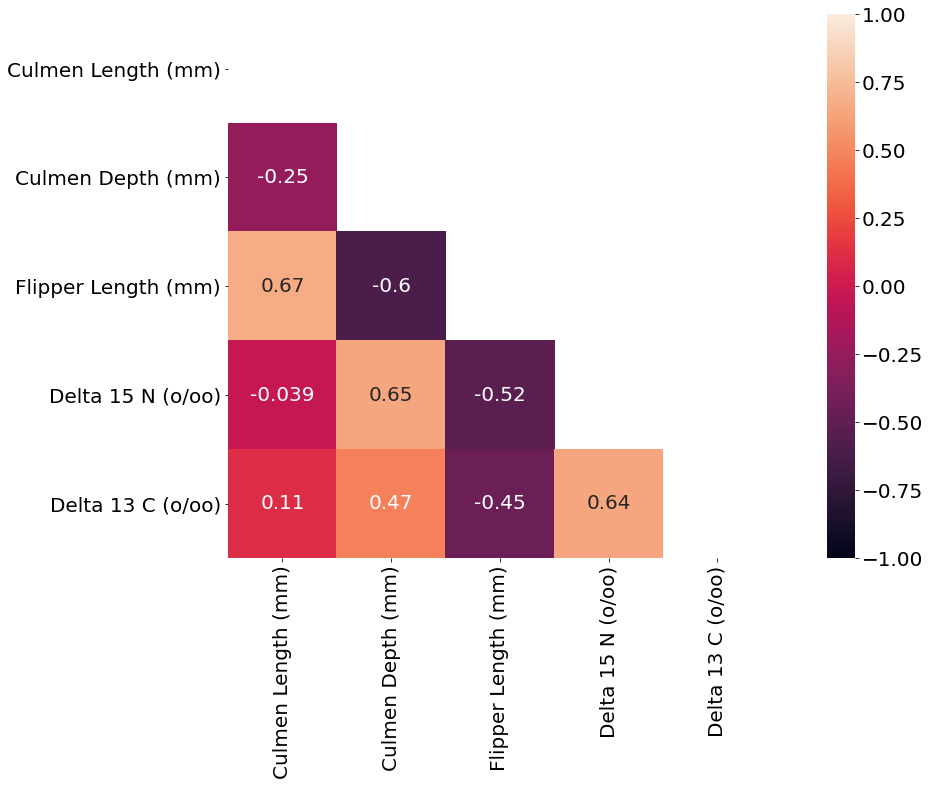

In [10]:
#수치형 독립변수간 상관관계
floatcol2=floatcol[:-1]
corr=train[floatcol2].corr()

mask=np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

figure, ax=plt.subplots()
figure.set_size_inches(20,10)
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, square=True, annot=True)

박스플랏 결과 각 변수에 이상치는 발견되지 않아 이상치를 고려하지 않고 분석을 진행할 수 있게 되었다. 한편, 연속형 독립변수간 상관관계를 통해 확인해 본 결과 일부 변수에서 높은 상관관계를 띠었다. 

Data Preprocessing
-EDA 결과를 참고하여 전처리할 부분
1.종속변수인 BodyMass의 정규성 여부
2.object형 가변수화
3.다중공선성 해결을 위한 주성분분석

1.종속변수인 BodyMass의 정규성 여부
shapiro검정 - 2000개 이하 데이터의 정규성검정에 적합

In [119]:
from scipy import stats
def shapiro(x):
    print('shapiro검정 p-value :{:.3f}'.format(stats.shapiro(train[x]).pvalue))
    if stats.shapiro(train[x]).pvalue>=0.05:
        print('변수는 정규분포를 만족한다.')
    else:
        print('변수는 정규분포를 만족하지 않는다.')
shapiro('Body Mass (g)')
#shapiro검정 결과 정규성을 띠지 않으므로 로그변환

shapiro검정 p-value :0.009
변수는 정규분포를 만족하지 않는다.


In [12]:
train['Body Mass (g)']=np.log1p(train['Body Mass (g)'])
shapiro('Body Mass (g)')

shapiro검정 p-value :0.054
변수는 정규분포를 만족한다.


2.object형 가변수화
-pandas라이브러리에 있는 get_dummies이용

In [11]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)
train

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g),Species_Adelie Penguin (Pygoscelis adeliae),Species_Chinstrap penguin (Pygoscelis antarctica),Species_Gentoo penguin (Pygoscelis papua),Island_Biscoe,Island_Dream,Island_Torgersen,Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE,Sex_UNKNOWN
0,50.0,15.3,220,8.305150,-25.190170,5550,0,0,1,1,0,0,0,1,0,1,0
1,49.5,19.0,200,9.630740,-24.346840,3800,0,1,0,0,1,0,1,0,0,1,0
2,45.1,14.4,210,8.519510,-27.018540,4400,0,0,1,1,0,0,0,1,1,0,0
3,44.5,14.7,214,8.201060,-26.165240,4850,0,0,1,1,0,0,0,1,1,0,0
4,49.6,16.0,225,8.383240,-26.842720,5700,0,0,1,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,36.6,17.8,185,8.737634,-25.723051,3700,1,0,0,0,0,1,0,1,1,0,0
110,39.2,18.6,190,9.110060,-25.795490,4250,1,0,0,0,1,0,0,1,0,1,0
111,43.2,18.5,192,8.970250,-26.036790,4100,1,0,0,0,1,0,0,1,0,1,0
112,46.9,16.6,192,9.805890,-24.737350,2700,0,1,0,0,1,0,1,0,1,0,0


3.다중공선성 해결을 위한 차원축소

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

                       PCA explained variance  PCA explained variance_ratio  \
principal component 1                2.804982                      0.556075   
principal component 2                1.352442                      0.268116   
principal component 3                0.462481                      0.091685   
principal component 4                0.296731                      0.058826   
principal component 5                0.127613                      0.025299   

                       Cum Ratio  
principal component 1   0.556075  
principal component 2   0.824191  
principal component 3   0.915876  
principal component 4   0.974701  
principal component 5   1.000000  


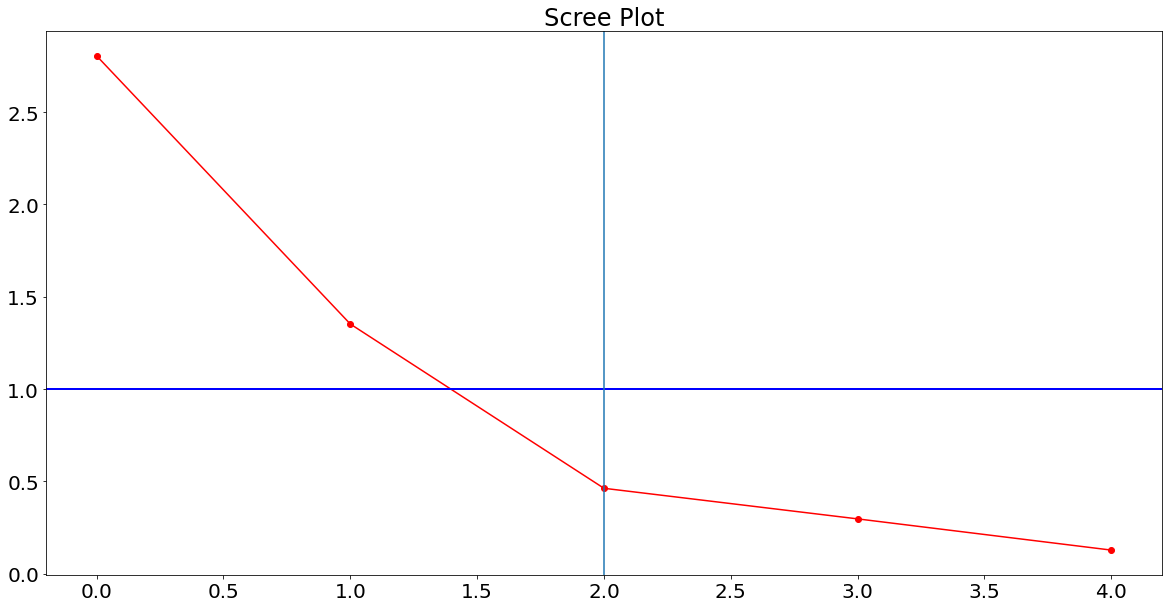

적절한 주성분 개수 :  2 개


In [13]:
std=StandardScaler().fit_transform(train[floatcol2])
pca=PCA()
pca.fit_transform(std)

compname="principal component"
variance=pd.DataFrame(pca.explained_variance_,index=[compname+" "+str(i) for i in range(1,train[floatcol2].shape[1]+1)],columns=["PCA explained variance"])
varratio=pd.DataFrame(pca.explained_variance_ratio_,index=[compname+" "+str(i) for i in range(1,train[floatcol2].shape[1]+1)],columns=["PCA explained variance_ratio"])
cumratio=pd.DataFrame(pca.explained_variance_ratio_.cumsum(),index=[compname+" "+str(i) for i in range(1,train[floatcol2].shape[1]+1)],columns=["Cum Ratio"])

pcasum=pd.concat([variance,varratio,cumratio],axis=1)
print(pcasum)
plt.figure(figsize=(20,10))
plt.rc('font',size=20)
plt.plot(pca.explained_variance_,'o-',color='red')
plt.title("Scree Plot")
plt.axhline(y=1,linewidth=2,color='blue')
plt.axvline(x=pcasum[pcasum['PCA explained variance']>=1].shape[0])
plt.show()
print("적절한 주성분 개수 : ",pcasum[pcasum['PCA explained variance']>=1].shape[0],"개")

주성분분석을 실시하여 각 주성분마다 설명되는 분산이 1 이상인 것을 추려낸 결과 5개의 차원을 축소하여 2차원으로 표현할 수 있었다. 이 때의 누적설명력은 약 82.4%이므로 데이터를 잘 설명하기 때문에 2개의 주성분을 선택하여 분석하였다.

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


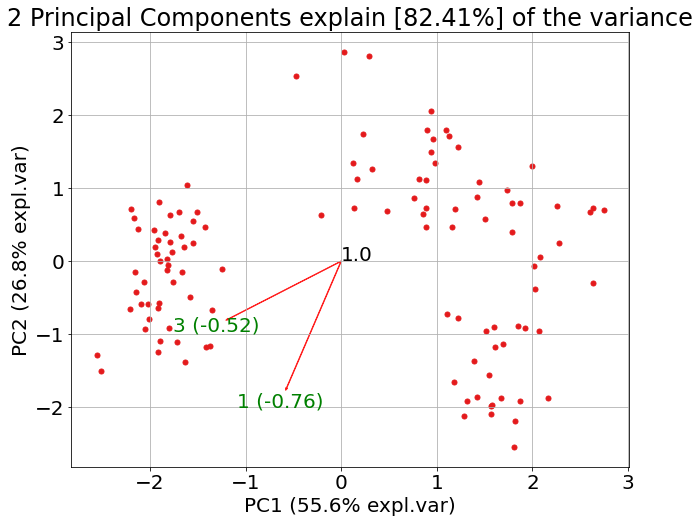

In [14]:
from pca import pca
model=pca(n_components=2)
model.fit_transform(std)
fig,ax=model.biplot(n_feat=2,legend=False)

PC1과 가장 큰 영향을 주는 변수는 Culmen Depth (mm) (펭귄 옆모습 기준 부리의 세로 길이), PC2에서 가장 큰 영향을 주는 변수는 Delta 15 N (o/oo) (토양에 따라 변화하는 안정 동위원소 15N:14N의 비율)로 나타났다. 하지만 주성분과의 상관관계가 그리 높은 편은 아니어서 그냥 PC1,PC2변수를 추가하여 모델링에 사용하였다.

MACHINE LEARNING

In [62]:
#주성분분석을 통해 새 테이블 만들기
def pca(data):
    std=StandardScaler().fit_transform(data[floatcol2])
    pca=PCA(n_components=2).fit_transform(std)
    pca_df=pd.DataFrame(pca,columns=["PCA"+str(i) for i in range(1,3)])
    return pca_df
train=pd.concat([train.iloc[:,5:],pca(train)],axis=1)
test=pd.concat([test.iloc[:,5:],pca(test)],axis=1)

In [63]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [64]:
y=train["Body Mass (g)"]
x=train.drop('Body Mass (g)',axis=1)

1.train_test

In [65]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=156)

In [85]:
alphas = [0.1*i for i in range(1,11)]
print("-------------------------------------------------------------------")
print("-----------------------------홀드아웃------------------------------")
print("-------------------------------------------------------------------")
print("xgboost 평균제곱")
#XGBOOST
for alpha in alphas:
    xgb = XGBRegressor(alpha=alpha)
    xgb.fit(X_train,y_train)
    
    pred=xgb.predict(X_test)
    print('alpha 값이',np.round(alpha,1),'일 때 mse:',np.round(np.sqrt(mean_squared_error(y_test, pred)),2))
print("-------------------------------------------------------------------")
print("lightgbm 평균제곱")
for alpha in alphas:
    lgbm = LGBMRegressor(alpha=alpha)
    lgbm.fit(X_train,y_train)
    
    pred=lgbm.predict(X_test)
    print('alpha 값이',np.round(alpha,1),'일 때 mse:',np.round(np.sqrt(mean_squared_error(y_test, pred)),2))

-------------------------------------------------------------------
-----------------------------홀드아웃------------------------------
-------------------------------------------------------------------
xgboost 평균제곱
alpha 값이 0.1 일 때 mse: 409.53
alpha 값이 0.2 일 때 mse: 430.09
alpha 값이 0.3 일 때 mse: 432.61
alpha 값이 0.4 일 때 mse: 432.29
alpha 값이 0.5 일 때 mse: 424.88
alpha 값이 0.6 일 때 mse: 427.18
alpha 값이 0.7 일 때 mse: 427.65
alpha 값이 0.8 일 때 mse: 427.2
alpha 값이 0.9 일 때 mse: 456.12
alpha 값이 1.0 일 때 mse: 457.18
-------------------------------------------------------------------
lightgbm 평균제곱
alpha 값이 0.1 일 때 mse: 313.7
alpha 값이 0.2 일 때 mse: 313.7
alpha 값이 0.3 일 때 mse: 313.7
alpha 값이 0.4 일 때 mse: 313.7
alpha 값이 0.5 일 때 mse: 313.7
alpha 값이 0.6 일 때 mse: 313.7
alpha 값이 0.7 일 때 mse: 313.7
alpha 값이 0.8 일 때 mse: 313.7
alpha 값이 0.9 일 때 mse: 313.7
alpha 값이 1.0 일 때 mse: 313.7


2.교차검증

In [67]:
print("-------------------------------------------------------------------")
print("-----------------------------교차검증------------------------------")
print("-------------------------------------------------------------------")
print("xgboost 평균제곱")
for alpha in alphas:
    xgb2 = XGBRegressor(alpha=alpha)
    
    neg_mse_scores = cross_val_score(xgb2, x, y, scoring = 'neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-neg_mse_scores))
    print('alpha 값 ', np.round(alpha,1), '일때 평균 rmse :', np.round(avg_rmse,2))
print("-------------------------------------------------------------------")
print("lightgbm 평균제곱")
for alpha in alphas:
    lgbm2 = LGBMRegressor(alpha=alpha)
    
    neg_mse_scores = cross_val_score(lgbm2, x, y, scoring = 'neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-neg_mse_scores))
    print('alpha 값 ', np.round(alpha,1), '일때 평균 rmse :', np.round(avg_rmse,2))

-------------------------------------------------------------------
-----------------------------교차검증------------------------------
-------------------------------------------------------------------
xgboost 평균제곱
alpha 값  0.1 일때 평균 rmse : 370.17
alpha 값  0.2 일때 평균 rmse : 370.06
alpha 값  0.3 일때 평균 rmse : 370.18
alpha 값  0.4 일때 평균 rmse : 370.64
alpha 값  0.5 일때 평균 rmse : 368.96
alpha 값  0.6 일때 평균 rmse : 369.56
alpha 값  0.7 일때 평균 rmse : 373.96
alpha 값  0.8 일때 평균 rmse : 375.04
alpha 값  0.9 일때 평균 rmse : 375.08
alpha 값  1.0 일때 평균 rmse : 375.54
-------------------------------------------------------------------
lightgbm 평균제곱
alpha 값  0.1 일때 평균 rmse : 325.01
alpha 값  0.2 일때 평균 rmse : 325.01
alpha 값  0.3 일때 평균 rmse : 325.01
alpha 값  0.4 일때 평균 rmse : 325.01
alpha 값  0.5 일때 평균 rmse : 325.01
alpha 값  0.6 일때 평균 rmse : 325.01
alpha 값  0.7 일때 평균 rmse : 325.01
alpha 값  0.8 일때 평균 rmse : 325.01
alpha 값  0.9 일때 평균 rmse : 325.01
alpha 값  1.0 일때 평균 rmse : 325.01


train_test를 이용해 8:2로 분할하고 lightgbm에서 mse가 가장 낮았기 때문에 lgbm 변수에 들어있는 모형을 최종모형으로 정하였다.

최종 예측모델

In [81]:
lgbm2 = LGBMRegressor(alpha=1)
lgbm2.fit(x,y)
submit_pred=lgbm2.predict(test)
submit['Body Mass (g)']=np.round(submit_pred,-1).astype(int)

In [84]:
submit.to_csv("sample_submission.csv",index=False)